# Overall Quality

Further analysis of the Overall Quality predictor is appropiate since exploratory analysis showed it to positively 
correlate with the prices of the houses.

    Rates the overall material and finish of the house:

        10	Very Excellent
        9	Excellent
        8	Very Good
        7	Good
        6	Above Average
        5	Average
        4	Below Average
        3	Fair
        2	Poor
        1	Very Poor

Are these categories truly ordinal, or should they be considered as nominal? If they are ordinal, does the order correspond to the prices of the houses proportionally?

In [4]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

raw_data.columns

raw_data.sample(20)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
177,906223110,1626,226500,20,RL,80.0,9938,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
257,528290180,1514,190000,60,RL,42.0,8433,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
455,535176070,1244,150000,20,RL,90.0,11988,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
416,903230110,1216,115000,50,RM,60.0,5520,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal
386,909253010,1913,177000,50,RL,57.0,7558,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
438,533125140,2786,372500,60,RL,105.0,11025,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
967,527359050,1370,152000,20,RL,80.0,10400,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Family
784,533250160,1719,324000,120,RL,32.0,10846,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2008,Con,Normal
208,535305120,1575,155000,20,RL,75.0,10170,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
670,908152060,1044,133500,80,RL,65.0,6285,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [117]:
raw_data['OverallQual'].value_counts() #number of houses in the poor and very poor categories is very small

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

Group by OverallQual and get the mean and median SalePrice for each category

In [72]:
OverallQual_df = raw_data.groupby(by='OverallQual', axis=0)
OverallQual_df

In [120]:
col_funct = {'SalePrice':['mean', 'median']}

OverallQual_SalePrice = OverallQual_df.agg(col_funct)
OverallQual_SalePrice.columns = OverallQual_SalePrice.columns.map('_'.join).str.strip('_')
OverallQual_SalePrice = OverallQual_SalePrice.reset_index()
OverallQual_SalePrice

,OverallQual,SalePrice_mean,SalePrice_median
0,1,60600.000000,61000.0
1,2,52325.307692,57625.0
2,3,86526.562500,81700.0
3,4,107910.994872,106500.0
4,5,136021.308101,134500.0
5,6,162635.550075,159900.0
6,7,204691.163810,199900.0
7,8,268912.641379,260722.5
8,9,359806.600000,346321.5
9,10,463051.100000,457500.0


Text(0.5, 0, 'OverallQual')

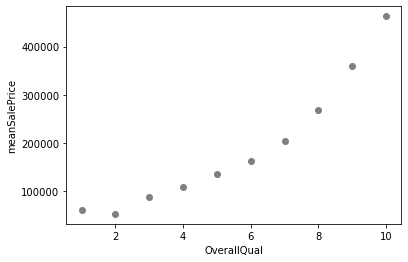

In [124]:
import matplotlib.pyplot as plt
import math

plt.scatter(OverallQual_SalePrice['OverallQual'],OverallQual_SalePrice['SalePrice_mean'],color='gray')
plt.ylabel('meanSalePrice')
plt.xlabel('OverallQual')

Text(0.5, 0, 'OverallQual')

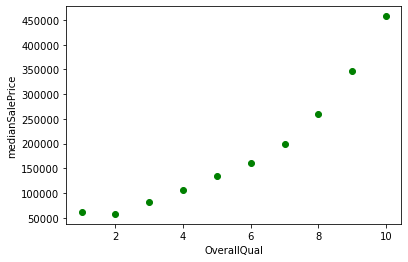

In [122]:
plt.scatter(OverallQual_SalePrice['OverallQual'],OverallQual_SalePrice['SalePrice_median'],color='green')
plt.ylabel('medianSalePrice')
plt.xlabel('OverallQual')

Both, mean and median have the same behavior in relation to the SalePrice. This looks like a log relationship. 
As previously discussed, the logSalePrice might be a fit transformation to perform linear regressions on. 

In [125]:
raw_data['logSalePrice'] = np.log(raw_data['SalePrice']) #make new logSalePrice column 

In [83]:
col_funct2 = {'logSalePrice':['median']}

OverallQual_logSalePrice = OverallQual_df.agg(col_funct2)
OverallQual_logSalePrice.columns = OverallQual_logSalePrice.columns.map('_'.join).str.strip('_')
OverallQual_logSalePrice = OverallQual_logSalePrice.reset_index()
OverallQual_logSalePrice

,OverallQual,logSalePrice_median
0,1,11.018629
1,2,10.961712
2,3,11.310803
3,4,11.575900
4,5,11.809319
5,6,11.982304
6,7,12.205573
7,8,12.471209
8,9,12.755066
9,10,13.033517


Text(0.5, 0, 'OverallQual')

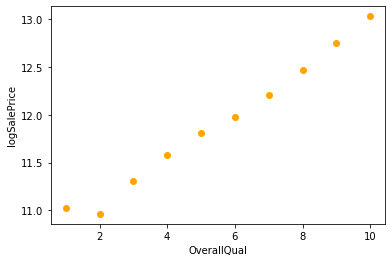

In [102]:
plt.scatter(OverallQual_SalePrice['OverallQual'],OverallQual_SalePrice['logSalePrice_median'],color='orange')
plt.ylabel('logSalePrice')
plt.xlabel('OverallQual')

Based on the results shown above and the fact that Very Poor(1) and Poor(2) have such low numbers, I will bin them into the Poor(2) category. The rest of the OverallQual categories remain the same.

In [126]:
raw_data['OverallQual_new']= np.where(raw_data['OverallQual'] == 1, 2, raw_data['OverallQual']) #made new column with the binned values
print(raw_data['OverallQual_new'].value_counts())

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      16
Name: OverallQual_new, dtype: int64


In [95]:
OverallQual_df2 = raw_data.groupby(by='OverallQual_new', axis=0)
OverallQual_df2

In [96]:
OverallQual_new_logSalePrice = OverallQual_df2.agg(col_funct2)
OverallQual_new_logSalePrice.columns = OverallQual_new_logSalePrice.columns.map('_'.join).str.strip('_')
OverallQual_new_logSalePrice = OverallQual_new_logSalePrice.reset_index()
OverallQual_new_logSalePrice

,OverallQual_new,logSalePrice_median
0,2,10.973502
1,3,11.310803
2,4,11.575900
3,5,11.809319
4,6,11.982304
5,7,12.205573
6,8,12.471209
7,9,12.755066
8,10,13.033517


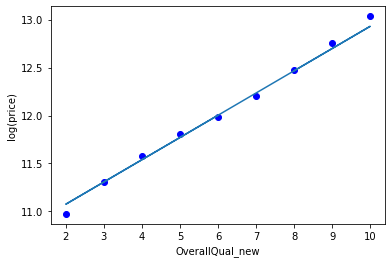

I will fit linear regressions of logSalePrice into both OverallQual and OverallQual_new

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lm = LinearRegression()

In [128]:
X = raw_data[['OverallQual']]
y = raw_data['logSalePrice']

lm.fit(X,y)

LinearRegression()

In [129]:
lm.coef_

array([0.23109735])

In [130]:
lm.score(X,y)

0.6657918020817275

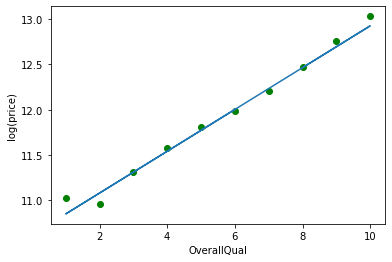

In [143]:
plt.scatter(OverallQual_logSalePrice['OverallQual'],OverallQual_logSalePrice['logSalePrice_median'],color='green')
plt.ylabel('log(price)')
plt.xlabel('OverallQual')
plt.plot(X, lm.coef_[0]*X + lm.intercept_)

In [134]:
lm2 = LinearRegression()
X2 = raw_data[['OverallQual_new']]
y2 = raw_data['logSalePrice']

lm2.fit(X2,y2)

LinearRegression()

In [135]:
lm2.score(X2,y2)

0.6658184091901176

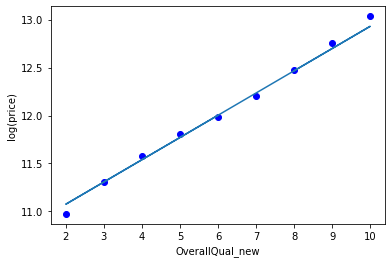

In [141]:
plt.scatter(OverallQual_new_logSalePrice['OverallQual_new'],OverallQual_new_logSalePrice['logSalePrice_median'],color='blue')
plt.ylabel('log(price)')
plt.xlabel('OverallQual_new')
plt.plot(X2, lm2.coef_[0]*X2 + lm2.intercept_)

In [144]:
0.6658184091901176-0.6657918020817275

2.660710839008651e-05

## Conclusions

The modification to the OverallQual variable marginally improves the R^2

This classification can be used as a numeric variable due to the linear relationship it holds with the logSalePrice